In [45]:
import pandas as pd

df = pd.read_csv('../Dataset/nasa_power_data.csv')

## EDA

In [46]:
# -999 = missing value
df.shape

(16399, 130)

In [47]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16399 entries, 0 to 16398
Columns: 130 entries, DATE to Z0M
dtypes: float64(129), object(1)
memory usage: 16.3+ MB
None


In [48]:
df.tail()

,DATE,AIRMASS,ALLSKY_KT,ALLSKY_NKT,ALLSKY_SFC_LW_DWN,ALLSKY_SFC_LW_UP,ALLSKY_SFC_PAR_DIFF,ALLSKY_SFC_PAR_DIRH,ALLSKY_SFC_PAR_TOT,ALLSKY_SFC_SW_DIFF,...,WS10M_RANGE,WS2M,WS2M_MAX,WS2M_MIN,WS2M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,Z0M
16394,2025-11-20,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,2.45,4.40,5.05,3.12,1.93,7.65,8.69,6.86,1.83,0.07
16395,2025-11-21,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,0.97,3.97,4.47,3.58,0.89,7.07,7.72,5.99,1.73,0.07
16396,2025-11-22,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
16397,2025-11-23,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
16398,2025-11-24,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00


In [49]:
df.columns = df.columns.str.lower()
df.columns

Index(['date', 'airmass', 'allsky_kt', 'allsky_nkt', 'allsky_sfc_lw_dwn',
       'allsky_sfc_lw_up', 'allsky_sfc_par_diff', 'allsky_sfc_par_dirh',
       'allsky_sfc_par_tot', 'allsky_sfc_sw_diff',
       ...
       'ws10m_range', 'ws2m', 'ws2m_max', 'ws2m_min', 'ws2m_range', 'ws50m',
       'ws50m_max', 'ws50m_min', 'ws50m_range', 'z0m'],
      dtype='object', length=130)

In [50]:
missing = df.isna().sum()
missing_df = pd.DataFrame({
    "missing_count": missing,
}).sort_values("missing_count", ascending=False)

missing_df.to_dict()

{'missing_count': {'clrsky_kt': 7305,
  'clrsky_days': 7305,
  'clrsky_sfc_sw_dwn': 7305,
  'disph': 7305,
  'clrsky_nkt': 7305,
  'clrsky_sfc_par_tot': 7305,
  'clrsky_sfc_lw_dwn': 7305,
  'clrsky_sfc_par_dirh': 7305,
  'clrsky_sfc_par_diff': 7305,
  'clrsky_sfc_lw_up': 7305,
  'cloud_amt': 7305,
  'cloud_amt_day': 7305,
  'cloud_amt_night': 7305,
  'cloud_od': 7305,
  'cdd18_3': 7305,
  'clrsky_sfc_sw_dni': 7305,
  'clrsky_sfc_sw_dirh': 7305,
  'clrsky_sfc_sw_diff': 7305,
  'clrsky_srf_alb': 7305,
  'clrsky_sfc_sw_up': 7305,
  'airmass': 0,
  'date': 0,
  'allsky_srf_alb': 0,
  'allsky_sfc_sw_dwn': 0,
  'allsky_sfc_sw_dni': 0,
  'allsky_sfc_sw_dirh': 0,
  'allsky_sfc_sw_diff': 0,
  'allsky_sfc_uv_index': 0,
  'allsky_sfc_uvb': 0,
  'allsky_sfc_uva': 0,
  'allsky_sfc_sw_up': 0,
  'allsky_kt': 0,
  'allsky_sfc_lw_dwn': 0,
  'allsky_nkt': 0,
  'aod_55': 0,
  'aod_84': 0,
  'aod_55_adj': 0,
  'allsky_sfc_lw_up': 0,
  'allsky_sfc_par_diff': 0,
  'allsky_sfc_par_dirh': 0,
  'allsky_sfc_par

## Drop columns

In [51]:
nan_cols = df.columns[df.isna().any()].tolist()
print("Columns with NaN:")
print(nan_cols)
print("Number of columns with NaN:", len(nan_cols))

Columns with NaN:
['cdd18_3', 'cloud_amt', 'cloud_amt_day', 'cloud_amt_night', 'cloud_od', 'clrsky_days', 'clrsky_kt', 'clrsky_nkt', 'clrsky_sfc_lw_dwn', 'clrsky_sfc_lw_up', 'clrsky_sfc_par_diff', 'clrsky_sfc_par_dirh', 'clrsky_sfc_par_tot', 'clrsky_sfc_sw_diff', 'clrsky_sfc_sw_dirh', 'clrsky_sfc_sw_dni', 'clrsky_sfc_sw_dwn', 'clrsky_sfc_sw_up', 'clrsky_srf_alb', 'disph']
Number of columns with NaN: 20


In [52]:
df = df.drop(columns=nan_cols)

In [53]:
df

,date,airmass,allsky_kt,allsky_nkt,allsky_sfc_lw_dwn,allsky_sfc_lw_up,allsky_sfc_par_diff,allsky_sfc_par_dirh,allsky_sfc_par_tot,allsky_sfc_sw_diff,...,ws10m_range,ws2m,ws2m_max,ws2m_min,ws2m_range,ws50m,ws50m_max,ws50m_min,ws50m_range,z0m
0,1981-01-01,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,2.20,2.11,3.52,1.41,2.11,4.04,4.98,3.05,1.93,0.04
1,1981-01-02,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,3.08,2.23,4.01,1.32,2.69,4.25,5.85,2.66,3.19,0.04
2,1981-01-03,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,3.61,2.83,4.83,1.64,3.19,5.30,7.30,3.73,3.57,0.04
3,1981-01-04,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,4.26,2.26,4.38,0.82,3.56,4.32,6.61,1.66,4.95,0.04
4,1981-01-05,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,2.54,1.24,2.19,0.22,1.97,2.37,3.54,0.21,3.33,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16394,2025-11-20,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,2.45,4.40,5.05,3.12,1.93,7.65,8.69,6.86,1.83,0.07
16395,2025-11-21,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,0.97,3.97,4.47,3.58,0.89,7.07,7.72,5.99,1.73,0.07
16396,2025-11-22,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00
16397,2025-11-23,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,-999.0,...,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00


In [54]:
def check_missing_flags(df):
    missing_flags = [-999, -999.0, -9999, -99, -99.0]
    rows = []

    for col in df.columns:
        count = df[col].isin(missing_flags).sum()
        rows.append({"column_name": col, "missing_flag_count": count})

    return pd.DataFrame(rows)

missing_report = check_missing_flags(df)
missing_report

,column_name,missing_flag_count
0,date,0
1,airmass,7391
2,allsky_kt,7391
3,allsky_nkt,7392
4,allsky_sfc_lw_dwn,2562
...,...,...
105,ws50m,3
106,ws50m_max,3
107,ws50m_min,3
108,ws50m_range,3


In [55]:
missing_report = check_missing_flags(df)

for idx, row in missing_report.iterrows():
    print(f"{row['column_name']}: {row['missing_flag_count']}")

date: 0
airmass: 7391
allsky_kt: 7391
allsky_nkt: 7392
allsky_sfc_lw_dwn: 2562
allsky_sfc_lw_up: 1181
allsky_sfc_par_diff: 7391
allsky_sfc_par_dirh: 7391
allsky_sfc_par_tot: 1181
allsky_sfc_sw_diff: 1181
allsky_sfc_sw_dirh: 7391
allsky_sfc_sw_dni: 7391
allsky_sfc_sw_dwn: 1101
allsky_sfc_sw_up: 1181
allsky_sfc_uva: 7391
allsky_sfc_uvb: 7391
allsky_sfc_uv_index: 7391
allsky_srf_alb: 7391
aod_55: 7391
aod_55_adj: 7391
aod_84: 7391
evland: 3
evptrns: 3
frost_days: 3
frseaice: 3
frsno: 3
gwetprof: 3
gwetroot: 3
gwettop: 3
gwm_height: 16399
gwm_height_anomaly: 16399
hdd0: 3
hdd10: 3
hdd18_3: 3
imerg_precliquid_prob: 16399
imerg_prectot: 16399
imerg_prectot_count: 16399
midday_insol: 7391
original_allsky_sfc_lw_dwn: 10189
original_allsky_sfc_sw_diff: 7391
original_allsky_sfc_sw_dirh: 7391
original_allsky_sfc_sw_dwn: 10189
original_clrsky_sfc_lw_dwn: 10189
original_clrsky_sfc_sw_dwn: 10189
pbltop: 24
precsno: 3
precsnoland: 24
prectotcorr: 3
ps: 3
psh: 7391
pw: 7391
qv10m: 3
qv2m: 3
rh2m: 3
rh

In [56]:
nan_cols2 = [
    'airmass',
    'allsky_kt',
    'allsky_nkt',
    'allsky_sfc_lw_dwn',
    'allsky_sfc_lw_up',
    'allsky_sfc_par_diff',
    'allsky_sfc_par_dirh',
    'allsky_sfc_par_tot',
    'allsky_sfc_sw_diff',
    'allsky_sfc_sw_dirh',
    'allsky_sfc_sw_dni',
    'allsky_sfc_sw_dwn',
    'allsky_sfc_sw_up',
    'allsky_sfc_uva',
    'allsky_sfc_uvb',
    'allsky_sfc_uv_index',
    'allsky_srf_alb',
    'aod_55',
    'aod_55_adj',
    'aod_84',
    'gwm_height',
    'gwm_height_anomaly',
    'imerg_precliquid_prob',
    'imerg_prectot',
    'imerg_prectot_count',
    'midday_insol',
    'original_allsky_sfc_lw_dwn',
    'original_allsky_sfc_sw_diff',
    'original_allsky_sfc_sw_dirh',
    'original_allsky_sfc_sw_dwn',
    'original_clrsky_sfc_lw_dwn',
    'original_clrsky_sfc_sw_dwn',
    'psh',
    'pw',
    'srf_alb_adj',
    'sza',
    'toa_sw_dni',
    'toa_sw_dwn',
    'ts_adj'
]

In [57]:
df = df.drop(columns=nan_cols2)

In [58]:
missing_report = check_missing_flags(df)
missing_report

,column_name,missing_flag_count
0,date,0
1,evland,3
2,evptrns,3
3,frost_days,3
4,frseaice,3
...,...,...
66,ws50m,3
67,ws50m_max,3
68,ws50m_min,3
69,ws50m_range,3


In [59]:
df.columns

Index(['date', 'evland', 'evptrns', 'frost_days', 'frseaice', 'frsno',
       'gwetprof', 'gwetroot', 'gwettop', 'hdd0', 'hdd10', 'hdd18_3', 'pbltop',
       'precsno', 'precsnoland', 'prectotcorr', 'ps', 'qv10m', 'qv2m', 'rh2m',
       'rhoa', 'slp', 'snodp', 't10m', 't10m_max', 't10m_min', 't10m_range',
       't2m', 't2mdew', 't2mwet', 't2m_max', 't2m_min', 't2m_range', 'to3',
       'tqv', 'troppb', 'tropq', 'tropt', 'ts', 'tsoil1', 'tsoil2', 'tsoil3',
       'tsoil4', 'tsoil5', 'tsoil6', 'tsurf', 'ts_max', 'ts_min', 'ts_range',
       'u10m', 'u2m', 'u50m', 'v10m', 'v2m', 'v50m', 'wd10m', 'wd2m', 'wd50m',
       'ws10m', 'ws10m_max', 'ws10m_min', 'ws10m_range', 'ws2m', 'ws2m_max',
       'ws2m_min', 'ws2m_range', 'ws50m', 'ws50m_max', 'ws50m_min',
       'ws50m_range', 'z0m'],
      dtype='object')

In [60]:
missing_flags = [-999, -999.0, -9999, -99, -99.0]

rows_with_missing_flags = df[df.isin(missing_flags).any(axis=1)]
print(rows_with_missing_flags)

             date  evland  evptrns  frost_days  frseaice  frsno  gwetprof  \
16375  2025-11-01    4.77     2.32         0.0       0.0    0.0      0.90   
16376  2025-11-02    4.25     2.29         0.0       0.0    0.0      0.91   
16377  2025-11-03    2.15     0.66         0.0       0.0    0.0      0.93   
16378  2025-11-04    3.96     1.44         0.0       0.0    0.0      0.94   
16379  2025-11-05    4.11     1.57         0.0       0.0    0.0      0.93   
16380  2025-11-06    4.40     1.88         0.0       0.0    0.0      0.93   
16381  2025-11-07    2.44     0.75         0.0       0.0    0.0      0.93   
16382  2025-11-08    4.02     1.79         0.0       0.0    0.0      0.93   
16383  2025-11-09    4.96     2.40         0.0       0.0    0.0      0.93   
16384  2025-11-10    3.80     1.89         0.0       0.0    0.0      0.92   
16385  2025-11-11    4.02     2.08         0.0       0.0    0.0      0.92   
16386  2025-11-12    3.96     2.46         0.0       0.0    0.0      0.92   

In [61]:
df['date'] = pd.to_datetime(df['date'])
last3 = df['date'].nlargest(3).tolist()
df = df[~df['date'].isin(last3)]

In [62]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    mask = df[col].isin(missing_flags)
    if mask.any():  
        mean_val = df.loc[~mask, col].mean()
        df.loc[mask, col] = mean_val

In [63]:
missing_report = check_missing_flags(df)
missing_report

,column_name,missing_flag_count
0,date,0
1,evland,0
2,evptrns,0
3,frost_days,0
4,frseaice,0
...,...,...
66,ws50m,0
67,ws50m_max,0
68,ws50m_min,0
69,ws50m_range,0


In [64]:
df['date'].dtype

dtype('<M8[ns]')

In [65]:
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date')

In [66]:
df.dtypes

date           datetime64[ns]
evland                float64
evptrns               float64
frost_days            float64
frseaice              float64
                    ...      
ws50m                 float64
ws50m_max             float64
ws50m_min             float64
ws50m_range           float64
z0m                   float64
Length: 71, dtype: object

In [67]:
print("Is date duplicate :", df['date'].duplicated().any())
print("Number of date with duplicate :", df['date'].duplicated().sum())

Is date duplicate : False
Number of date with duplicate : 0


In [68]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

In [69]:
df['week'] = df['date'].dt.isocalendar().week
df['weekday'] = df['date'].dt.dayofweek     # Monday = 0

def asia_season(m):
    if m in [12, 1, 2]:
        return "winter"
    elif m in [3, 4, 5]:
        return "summer"
    else:
        return "rainy"

df['season'] = df['month'].apply(asia_season)

In [70]:
season_map = {
    "winter": 0,
    "summer": 1,
    "rainy": 2
}

df['season_num'] = df['season'].map(season_map)

In [71]:
# column date, season wait for drop when training
df.head(3)

,date,evland,evptrns,frost_days,frseaice,frsno,gwetprof,gwetroot,gwettop,hdd0,...,ws50m_min,ws50m_range,z0m,year,month,day,week,weekday,season,season_num
0,1981-01-01,1.88,0.34,0.0,0.0,0.0,0.61,0.61,0.62,0.0,...,3.05,1.93,0.04,1981,1,1,1,3,winter,0
1,1981-01-02,1.77,0.28,0.0,0.0,0.0,0.61,0.60,0.62,0.0,...,2.66,3.19,0.04,1981,1,2,1,4,winter,0
2,1981-01-03,1.72,0.24,0.0,0.0,0.0,0.60,0.60,0.62,0.0,...,3.73,3.57,0.04,1981,1,3,1,5,winter,0


In [72]:
df.columns

Index(['date', 'evland', 'evptrns', 'frost_days', 'frseaice', 'frsno',
       'gwetprof', 'gwetroot', 'gwettop', 'hdd0', 'hdd10', 'hdd18_3', 'pbltop',
       'precsno', 'precsnoland', 'prectotcorr', 'ps', 'qv10m', 'qv2m', 'rh2m',
       'rhoa', 'slp', 'snodp', 't10m', 't10m_max', 't10m_min', 't10m_range',
       't2m', 't2mdew', 't2mwet', 't2m_max', 't2m_min', 't2m_range', 'to3',
       'tqv', 'troppb', 'tropq', 'tropt', 'ts', 'tsoil1', 'tsoil2', 'tsoil3',
       'tsoil4', 'tsoil5', 'tsoil6', 'tsurf', 'ts_max', 'ts_min', 'ts_range',
       'u10m', 'u2m', 'u50m', 'v10m', 'v2m', 'v50m', 'wd10m', 'wd2m', 'wd50m',
       'ws10m', 'ws10m_max', 'ws10m_min', 'ws10m_range', 'ws2m', 'ws2m_max',
       'ws2m_min', 'ws2m_range', 'ws50m', 'ws50m_max', 'ws50m_min',
       'ws50m_range', 'z0m', 'year', 'month', 'day', 'week', 'weekday',
       'season', 'season_num'],
      dtype='object')

In [73]:
for i in list(df.columns):
  print(i,", Type: " + df[i].dtype.name)

date , Type: datetime64[ns]
evland , Type: float64
evptrns , Type: float64
frost_days , Type: float64
frseaice , Type: float64
frsno , Type: float64
gwetprof , Type: float64
gwetroot , Type: float64
gwettop , Type: float64
hdd0 , Type: float64
hdd10 , Type: float64
hdd18_3 , Type: float64
pbltop , Type: float64
precsno , Type: float64
precsnoland , Type: float64
prectotcorr , Type: float64
ps , Type: float64
qv10m , Type: float64
qv2m , Type: float64
rh2m , Type: float64
rhoa , Type: float64
slp , Type: float64
snodp , Type: float64
t10m , Type: float64
t10m_max , Type: float64
t10m_min , Type: float64
t10m_range , Type: float64
t2m , Type: float64
t2mdew , Type: float64
t2mwet , Type: float64
t2m_max , Type: float64
t2m_min , Type: float64
t2m_range , Type: float64
to3 , Type: float64
tqv , Type: float64
troppb , Type: float64
tropq , Type: float64
tropt , Type: float64
ts , Type: float64
tsoil1 , Type: float64
tsoil2 , Type: float64
tsoil3 , Type: float64
tsoil4 , Type: float64
tsoil

In [74]:
zero_report = (df == 0).sum()

zero_df = zero_report.reset_index()
zero_df.columns = ['column_name', 'zero_count']

In [75]:
zero_df

,column_name,zero_count
0,date,0
1,evland,0
2,evptrns,1756
3,frost_days,16396
4,frseaice,16396
...,...,...
73,day,0
74,week,0
75,weekday,2342
76,season,0


In [76]:
cols_to_drop = [
    'frost_days',
    'precsno',
    'precsnoland',
    'snodp',
    'frsno',
    'frseaice'
]

df = df.drop(columns=cols_to_drop, errors='ignore')

In [77]:
# Monday = 0
# winter = 0, summer = 1, rainy = 2

In [78]:
df = df.drop(columns=["season"], errors='ignore')

In [79]:
df.columns

Index(['date', 'evland', 'evptrns', 'gwetprof', 'gwetroot', 'gwettop', 'hdd0',
       'hdd10', 'hdd18_3', 'pbltop', 'prectotcorr', 'ps', 'qv10m', 'qv2m',
       'rh2m', 'rhoa', 'slp', 't10m', 't10m_max', 't10m_min', 't10m_range',
       't2m', 't2mdew', 't2mwet', 't2m_max', 't2m_min', 't2m_range', 'to3',
       'tqv', 'troppb', 'tropq', 'tropt', 'ts', 'tsoil1', 'tsoil2', 'tsoil3',
       'tsoil4', 'tsoil5', 'tsoil6', 'tsurf', 'ts_max', 'ts_min', 'ts_range',
       'u10m', 'u2m', 'u50m', 'v10m', 'v2m', 'v50m', 'wd10m', 'wd2m', 'wd50m',
       'ws10m', 'ws10m_max', 'ws10m_min', 'ws10m_range', 'ws2m', 'ws2m_max',
       'ws2m_min', 'ws2m_range', 'ws50m', 'ws50m_max', 'ws50m_min',
       'ws50m_range', 'z0m', 'year', 'month', 'day', 'week', 'weekday',
       'season_num'],
      dtype='object')

## Distribution

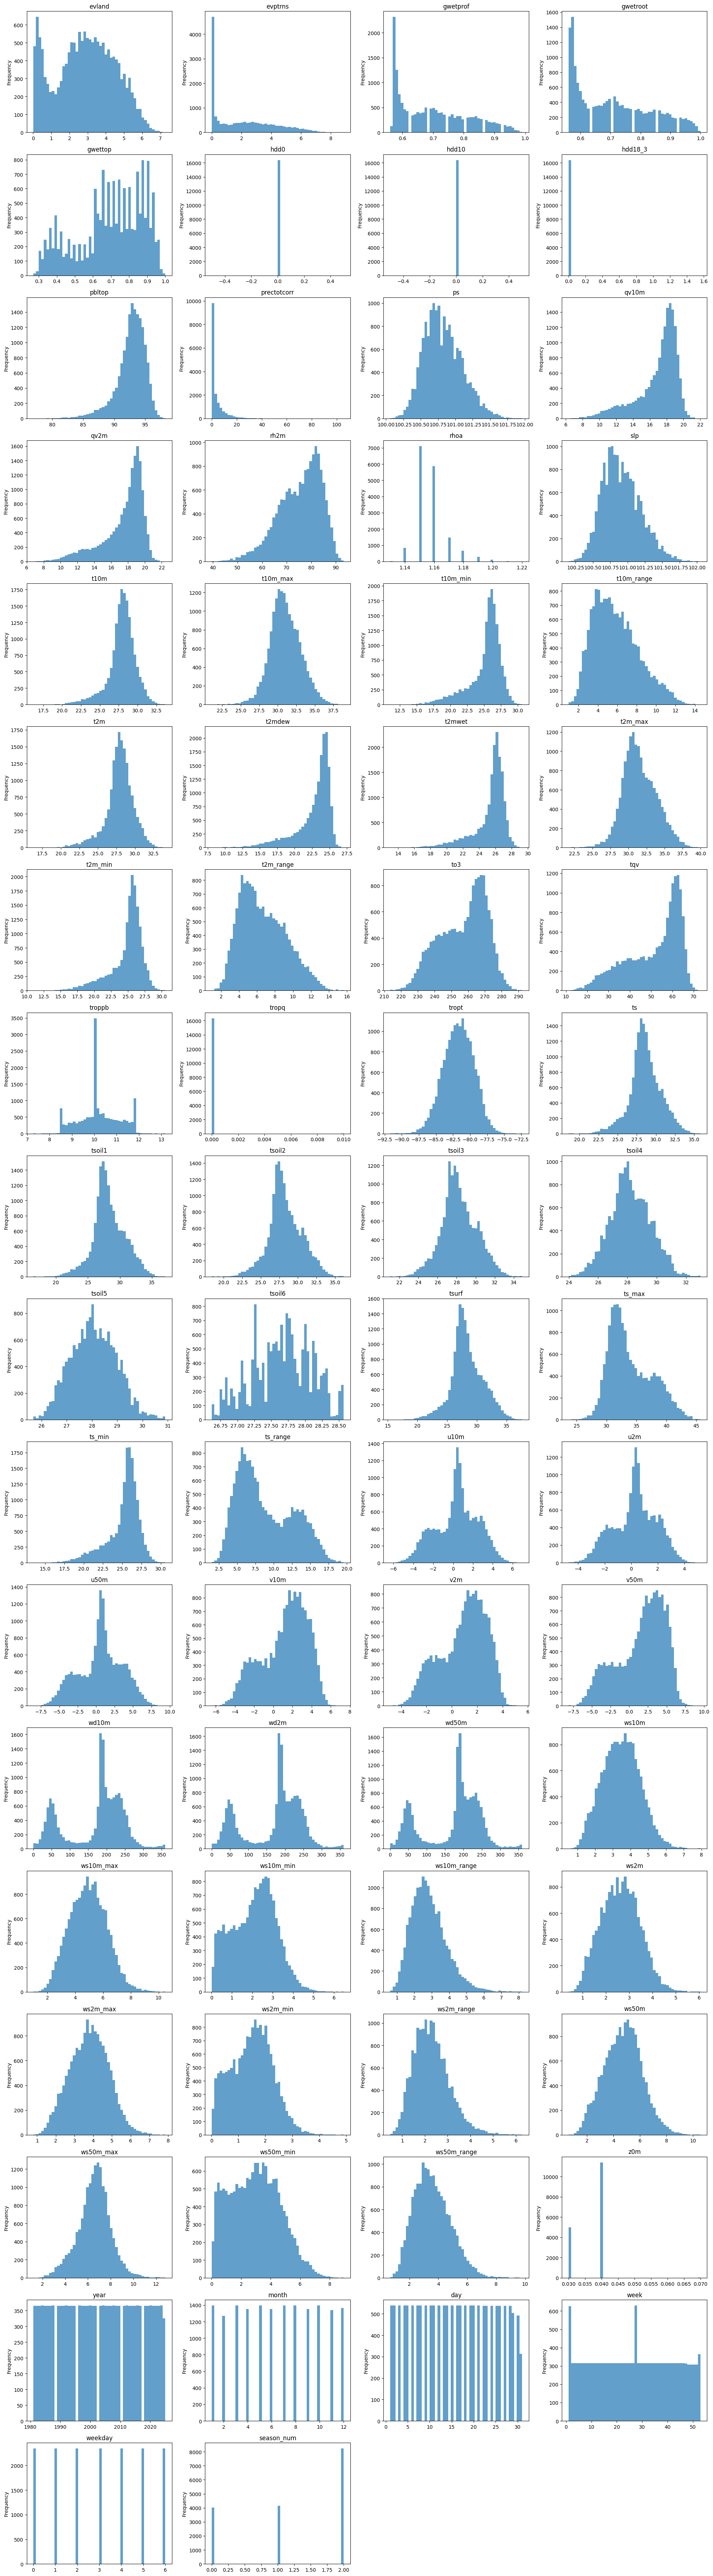

In [80]:
import matplotlib.pyplot as plt
import numpy as np

def plot_all_distributions(df, bins=50):
    # เลือกเฉพาะ column numeric
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    n_cols = 4   # จำนวน subplot ต่อแถว
    n_rows = (len(num_cols) + n_cols - 1) // n_cols  # คำนวณจำนวนแถวอัตโนมัติ

    plt.figure(figsize=(20, n_rows * 4))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        df[col].plot(kind='hist', bins=bins, alpha=0.7)
        plt.title(col)
        plt.tight_layout()

    plt.show()

plot_all_distributions(df)

In [81]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import joblib

def get_min_max_report(df):
    num_cols = df.select_dtypes(include=[np.number]).columns

    report = []

    for col in num_cols:
        report.append({
            "column": col,
            "min": df[col].min(),
            "max": df[col].max()
        })

    return pd.DataFrame(report)

min_max_report = get_min_max_report(df)

for idx, row in min_max_report.iterrows():
    print(f"{row['column']}: min={row['min']}, max={row['max']}")

evland: min=0.01, max=7.27
evptrns: min=0.0, max=8.86
gwetprof: min=0.56, max=0.99
gwetroot: min=0.56, max=1.0
gwettop: min=0.27, max=1.0
hdd0: min=0.0, max=0.0
hdd10: min=0.0, max=0.0
hdd18_3: min=0.0, max=1.56
pbltop: min=76.95, max=98.23
prectotcorr: min=0.0, max=105.45
ps: min=100.06, max=101.96
qv10m: min=6.33, max=22.03
qv2m: min=6.77, max=22.42
rh2m: min=39.49, max=93.2
rhoa: min=1.13, max=1.22
slp: min=100.15, max=102.05
t10m: min=16.18, max=33.67
t10m_max: min=21.08, max=38.89
t10m_min: min=11.07, max=30.62
t10m_range: min=0.98, max=14.57
t2m: min=16.28, max=34.09
t2mdew: min=8.07, max=27.04
t2mwet: min=13.03, max=29.28
t2m_max: min=21.68, max=39.98
t2m_min: min=10.97, max=30.55
t2m_range: min=0.96, max=15.64
to3: min=213.48, max=292.13
tqv: min=11.2, max=73.21
troppb: min=7.27, max=13.18
tropq: min=0.0, max=0.01
tropt: min=-91.71, max=-72.38
ts: min=18.57, max=35.84
tsoil1: min=16.47, max=37.09
tsoil2: min=18.39, max=36.17
tsoil3: min=21.01, max=34.88
tsoil4: min=23.98, max=3

## Shift for 7 days forecast

| Task                    | y (Target)         |
| ----------------------- | ------------------ |
| **Weather Forecast**    | `t2m`  |
| **Rainfall**            | `prectotcorr`      |
| **Evapotranspiration**  | `evland + evptrns` |
| **Soil Moisture**       | `gwettop`          |
| **Wind Speed**          | `ws10m`            |

In [82]:
H = 7

df["et_total"] = df["evland"] + df["evptrns"]

# Temperature
for h in range(1, H+1):
    df[f"t2m_d{h}_forecast"] = df["t2m"].shift(-h)

# Rain
for h in range(1, H+1):
    df[f"rain_d{h}_forecast"] = df["prectotcorr"].shift(-h)

# ET
for h in range(1, H+1):
    df[f"et_d{h}_forecast"] = df["et_total"].shift(-h)

# Soil moisture
for h in range(1, H+1):
    df[f"soil_d{h}_forecast"] = df["gwettop"].shift(-h)

# Wind
for h in range(1, H+1):
    df[f"wind_d{h}_forecast"] = df["ws10m"].shift(-h)

In [83]:
df.head(2)

,date,evland,evptrns,gwetprof,gwetroot,gwettop,hdd0,hdd10,hdd18_3,pbltop,...,soil_d5_forecast,soil_d6_forecast,soil_d7_forecast,wind_d1_forecast,wind_d2_forecast,wind_d3_forecast,wind_d4_forecast,wind_d5_forecast,wind_d6_forecast,wind_d7_forecast
0,1981-01-01,1.88,0.34,0.61,0.61,0.62,0.0,0.0,0.0,93.03,...,0.59,0.58,0.56,3.09,3.83,3.09,1.75,2.36,2.64,1.95
1,1981-01-02,1.77,0.28,0.61,0.60,0.62,0.0,0.0,0.0,91.99,...,0.58,0.56,0.55,3.83,3.09,1.75,2.36,2.64,1.95,2.52


In [84]:
H = 7

target_cols = []

target_prefix = {
    "t2m": "t2m",
    "rain": "prectotcorr",
    "et": "et_total",
    "soil": "gwettop",
    "wind": "ws10m",
}

for name in target_prefix.keys():
    for h in range(1, H+1):
        target_cols.append(f"{name}_d{h}_forecast")
        
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
feature_cols = [col for col in num_cols if col not in target_cols]

In [85]:
df = df.dropna(subset=target_cols)

In [86]:
df

,date,evland,evptrns,gwetprof,gwetroot,gwettop,hdd0,hdd10,hdd18_3,pbltop,...,soil_d5_forecast,soil_d6_forecast,soil_d7_forecast,wind_d1_forecast,wind_d2_forecast,wind_d3_forecast,wind_d4_forecast,wind_d5_forecast,wind_d6_forecast,wind_d7_forecast
0,1981-01-01,1.88,0.34,0.61,0.61,0.62,0.0,0.0,0.0,93.03000,...,0.59,0.58,0.56,3.09,3.83,3.09,1.75,2.36,2.64,1.95
1,1981-01-02,1.77,0.28,0.61,0.60,0.62,0.0,0.0,0.0,91.99000,...,0.58,0.56,0.55,3.83,3.09,1.75,2.36,2.64,1.95,2.52
2,1981-01-03,1.72,0.24,0.60,0.60,0.62,0.0,0.0,0.0,91.67000,...,0.56,0.55,0.54,3.09,1.75,2.36,2.64,1.95,2.52,3.58
3,1981-01-04,1.70,0.22,0.60,0.60,0.61,0.0,0.0,0.0,89.77000,...,0.55,0.54,0.53,1.75,2.36,2.64,1.95,2.52,3.58,6.90
4,1981-01-05,1.69,0.21,0.60,0.60,0.60,0.0,0.0,0.0,89.30000,...,0.54,0.53,0.53,2.36,2.64,1.95,2.52,3.58,6.90,6.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16384,2025-11-10,3.80,1.89,0.92,0.94,0.92,0.0,0.0,0.0,92.68754,...,0.90,0.90,0.91,1.53,1.01,1.80,3.70,4.17,4.63,4.17
16385,2025-11-11,4.02,2.08,0.92,0.94,0.92,0.0,0.0,0.0,92.68754,...,0.90,0.91,0.92,1.01,1.80,3.70,4.17,4.63,4.17,4.89
16386,2025-11-12,3.96,2.46,0.92,0.94,0.92,0.0,0.0,0.0,92.68754,...,0.91,0.92,0.91,1.80,3.70,4.17,4.63,4.17,4.89,6.46
16387,2025-11-13,2.83,1.06,0.92,0.94,0.92,0.0,0.0,0.0,92.68754,...,0.92,0.91,0.90,3.70,4.17,4.63,4.17,4.89,6.46,5.80


### Normalize

In [87]:
# scaler = StandardScaler()

# df_scaled = df.copy()
# df_scaled[feature_cols] = scaler.fit_transform(df[feature_cols])

# # Save scaler to airflow models folder for pipeline consistency
# import os
# scaler_dir = r'F:\University\Year 3 Semester 1\CSS342 - Data Sci & Data En\Project_V2\Climate Change\backend-project\airflow\models'

# os.makedirs(scaler_dir, exist_ok=True)
# scaler_path = os.path.join(scaler_dir, 'feature_scaler.pkl')
# joblib.dump(scaler, scaler_path)

# print(f"Scaler saved to: {scaler_path}")

### Export

In [89]:
df.to_csv('../Dataset/nasa_power_prepared_data.csv', index=False)
df.tail(1)

,date,evland,evptrns,gwetprof,gwetroot,gwettop,hdd0,hdd10,hdd18_3,pbltop,...,soil_d5_forecast,soil_d6_forecast,soil_d7_forecast,wind_d1_forecast,wind_d2_forecast,wind_d3_forecast,wind_d4_forecast,wind_d5_forecast,wind_d6_forecast,wind_d7_forecast
16388,2025-11-14,4.9,1.66,0.92,0.94,0.91,0.0,0.0,0.0,92.68754,...,0.91,0.9,0.89,4.17,4.63,4.17,4.89,6.46,5.8,5.23


In [ ]:
import matplotlib.pyplot as plt

# เลือกเฉพาะฟีเจอร์หลัก
main_features = ['t2m', 'prectotcorr', 'et_total', 'gwettop', 'ws10m']

plt.figure(figsize=(14, 7))
for feat in main_features:
    if feat in df.columns:
        plt.plot(df['date'], df[feat], label=feat)
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series: t2m, Rain, ET, Soil Moisture, Wind')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()